**DEPENDÊNCIAS**
 - pip install tensorflow
 - pip install opencv-python

In [106]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os, cv2, imghdr

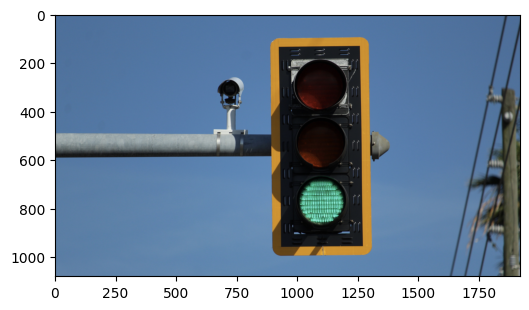

In [107]:
def plotImage(img):
    colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 15))
    plt.imshow(colored)
    plt.show()

plotImage(cv2.imread('data/green/5-1.jpeg')) 

# TRATAMENTO DE DADOS
- Removendo nas pastas de fotos todos os formatos indesejados

In [108]:
dataDir    = 'data'
extensions = ['jpeg', 'jpg', 'bmp', 'svg', 'png']

In [109]:
for imageClass in os.listdir(dataDir):
    print('class: ', imageClass)
    folderPath = os.path.join(dataDir, imageClass)

    for image in os.listdir(folderPath):
        imagePath = os.path.join(folderPath, image)
        
        try:
            img     = cv2.imread(imagePath) 
            imgType = imghdr.what(imagePath)

            if imgType not in extensions:
                os.remove(imagePath)
        except Exception as e:
            print('erro ao ler: ', imagePath)
            os.remove(imagePath)

class:  green
class:  red
class:  yellow


# EXTRAINDO OS DADOS

In [110]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 185 files belonging to 3 classes.


- Pegando e todas as imagens e passando o intervalo RGB de 0 a 255 para 0 a 1

In [111]:
data = data.map(lambda x, y: (x/255, y))

In [112]:
iterator = data.as_numpy_iterator()
batch    = iterator.next()

print('size: ', len(batch[0]), ' | labels: ', batch[1])

size:  32  | labels:  [0 0 1 2 1 1 1 1 1 2 1 2 1 1 1 1 0 1 0 0 0 0 1 0 0 2 2 1 2 2 1 1]


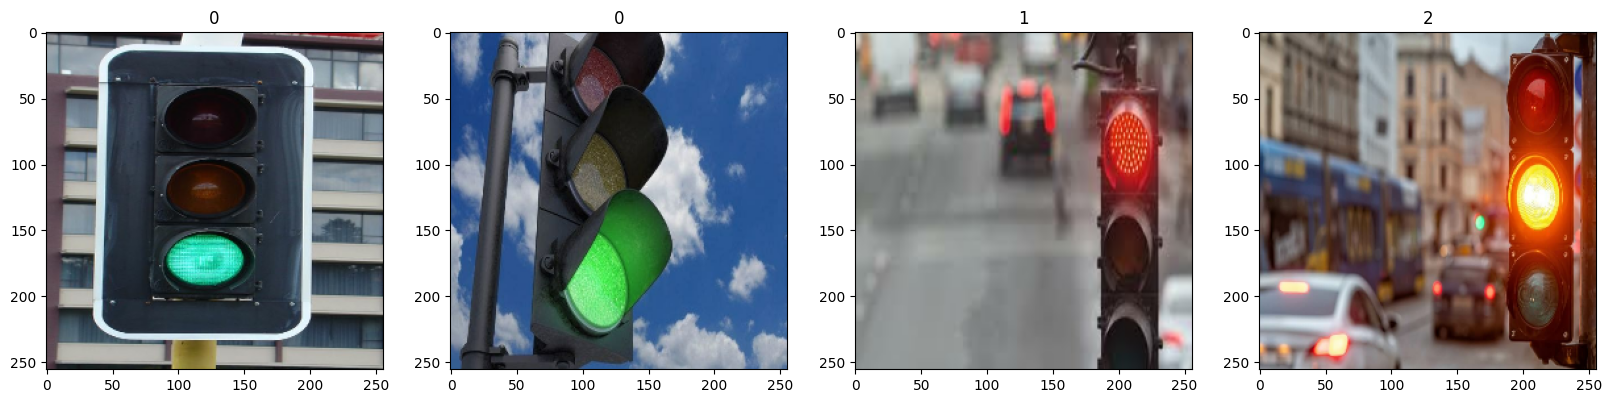

In [113]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img)
    ax[i].title.set_text(batch[1][i])

# DADOS DE TREINAMENTO

In [114]:
trainSize = int(len(data)*.7)
valSize   = int(len(data)*.2)
testSize  = int(len(data)*.1)+1

len(data), trainSize, valSize, testSize

(6, 4, 1, 1)

In [115]:
train = data.take(trainSize)
val   = data.skip(trainSize).take(valSize)
test  = data.skip(trainSize + valSize).take(testSize)

len(data), len(train), len(val), len(test)

(6, 4, 1, 1)

# DEEP MODEL

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [117]:
model = Sequential()

- Adicionando as Camadas (Layers)
- As camadas terão 16 filtros de tamanho 3x3 pixels movendo 1 passo de cada vez (1 pixel)

In [118]:
conv = Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3))
model.add(conv)
model.add(MaxPooling2D())

conv = Conv2D(32, (3,3), 1, activation='relu')
model.add(conv)
model.add(MaxPooling2D())

conv = Conv2D(16, (3,3), 1, activation='relu')
model.add(conv)
model.add(MaxPooling2D())

model.add(Flatten())

dense = Dense(256, activation='relu')
model.add(dense)

dense = Dense(1, activation='sigmoid')
model.add(dense)

c:\Users\march\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Compilando o modelo

In [119]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

- Criando callbacks que servem como checkpoints para ver logs ou restaurar o modelo a partir de um certo ponto

In [121]:
logDir = 'logs'
tensorBoardCallback = tf.keras.callbacks.TensorBoard(log_dir=logDir)

- Treinando o modelo

In [122]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorBoardCallback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.4500 - loss: 0.4143 - val_accuracy: 0.5000 - val_loss: 0.1251
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.4604 - loss: -0.3395 - val_accuracy: 0.3750 - val_loss: -0.0327
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.5000 - loss: -1.9208 - val_accuracy: 0.5000 - val_loss: 2.1138
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.4677 - loss: -0.6882 - val_accuracy: 0.5625 - val_loss: -10.3988
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.5135 - loss: -1.3334 - val_accuracy: 0.5312 - val_loss: -18.8403
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.4865 - loss: -4.0171 - val_accuracy: 0.4375 - val_loss: -25.6607
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.5052 - loss: 0.7457 - val_accuracy: 0.5625 - val_loss: -4.2800
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 548ms/step - accuracy: 0.4396 - loss: -17.1079 - val_accuracy: 0.3

- Conferindo os dados de perda com a validação, se os dois se afastarem muito pode ser um problema de overfit ou underfit, sendo necessário alterar o modelo para se ajustar aos dados

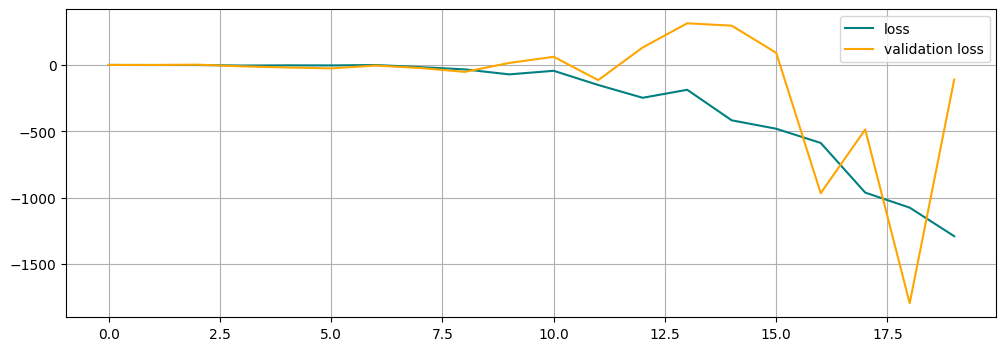

In [123]:
plt.figure(figsize=(12, 4))

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='validation loss')
plt.legend()
plt.grid()


# TESTANDO O MODELO

In [124]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [125]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [126]:
for batch in test.as_numpy_iterator():
    xTest, yTest = batch
    yModel = model.predict(xTest)
    
    pre.update_state(yTest, yModel)
    rec.update_state(yTest, yModel)
    acc.update_state(yTest, yModel)


print('precision: ', float(pre.result()))
print('recall:    ', float(rec.result()))
print('accuracy:  ', float(acc.result()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
precision:  0.8260869383811951
recall:     0.949999988079071
accuracy:   0.6800000071525574


In [135]:
def getPrediction(filePath):
    img        = cv2.imread(filePath)
    resize     = tf.image.resize(img, (256, 256)) / 255
    predictMatrix = model.predict(np.expand_dims(resize, 0))
    prediction    = predictMatrix[0][0]
    return round(float(prediction), 2)


def getLabel(prediction):
    if prediction <= 1:
        return 'green'
    
    if 1 < prediction < 2:
        return 'red'
    
    return 'yellow'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


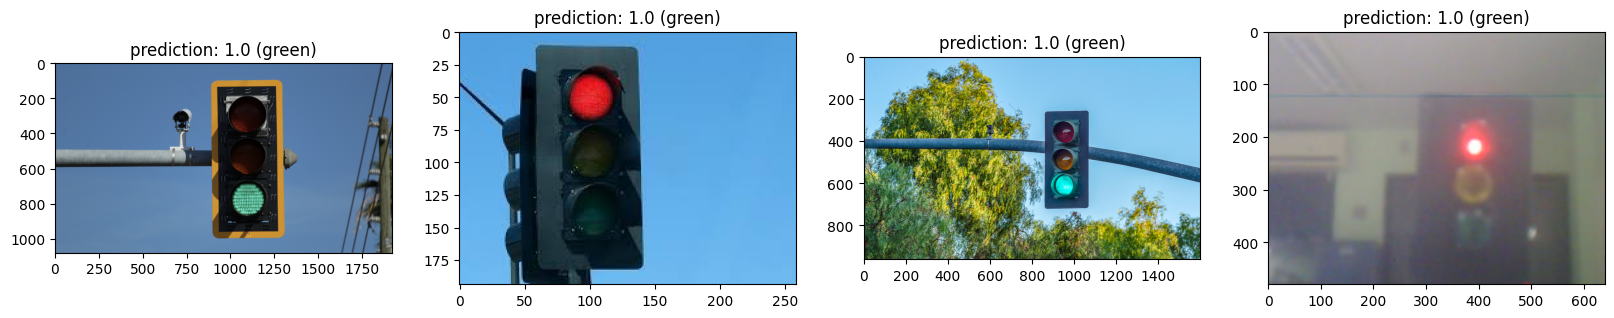

In [136]:
files = os.listdir('test')
fig, ax = plt.subplots(ncols=4, figsize=(20, 4))

for i, file in enumerate(files):
    path = os.path.join('test', file)
    prediction = getPrediction(path)
    label      = getLabel(prediction)

    showImg = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    ax[i].imshow(showImg)
    ax[i].title.set_text(f'prediction: {prediction} ({label})')

# SALVANDO O ARQUIVO

In [129]:
from tensorflow.keras.models import load_model

In [130]:
model.save('trained_model.h5')

- Carregando o modelo e usando novamente

In [131]:
model = load_model('trained_model.h5')
model

<Sequential name=sequential_3, built=True>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


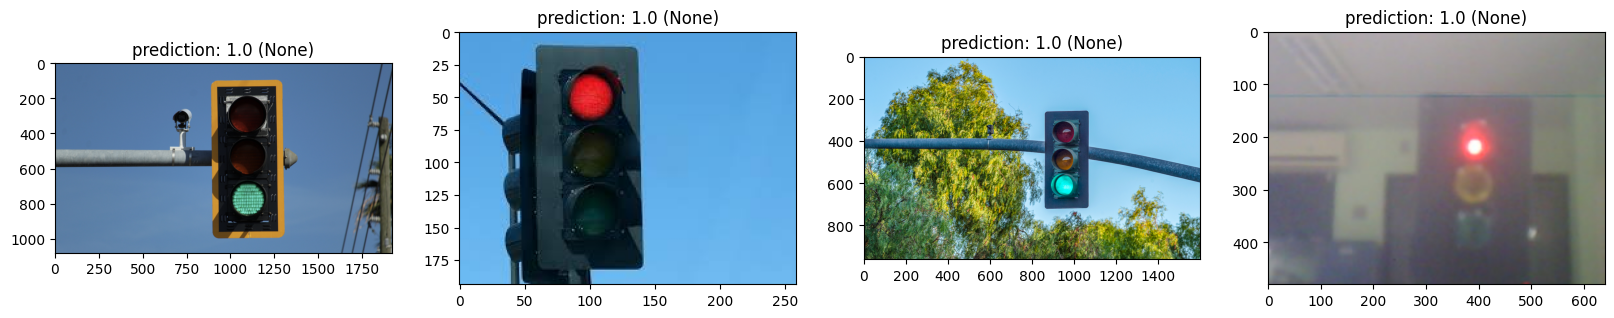

In [132]:
files = os.listdir('test')
fig, ax = plt.subplots(ncols=4, figsize=(20, 4))

for i, file in enumerate(files):
    path = os.path.join('test', file)
    prediction = getPrediction(path)
    label      = getLabel(prediction)

    showImg = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    ax[i].imshow(showImg)
    ax[i].title.set_text(f'prediction: {prediction} ({label})')